In [28]:
import matplotlib.pyplot as plt 
from archivos.carga_datos import *
from gurobipy import GRB, Model, quicksum
from gurobipy import *
import numpy as np

alimentos, cant_por_tipo, total_alimentos = alimentos(tipos)

cant_de_centros = 1
cant_de_bodegas = 1
cant_de_camiones = 15
P_m = 31000

tmax = 10

T = range(1, tmax + 1)    #tiempo

I = range(1, len(cant_por_tipo) + 1) # Tipos de alimentos 1: Hortofrutícola 2:Congelado 3:Refrigerado
A = range(1, cant_por_tipo[0] + 1) # Alimentos de cada tipo
J = range(1, cant_de_centros + 1) # Cantidad de centros de distribución
K = range(1, cant_de_bodegas + 1) # Cantidad de bodegas de almacenamiento
R = range(1, len(rutas) + 1) # 1:Norte, 2:Centro, 3:Sur
P = range(1, len(paises) + 1) # 1:Chile, 2:Argentina
E = range(1, cant_de_camiones + 1)

# Al[a,i,k,t] ExT[a,i,k,t] Tr[a,i,j,k,t,e] Cam[e,a,i,j,k,t]

Tr = np.zeros((cant_por_tipo[0],len(cant_por_tipo),cant_de_centros,cant_de_bodegas,tmax,cant_de_camiones))
Al = np.zeros((cant_por_tipo[0], len(cant_por_tipo),cant_de_bodegas,tmax))
ExT = np.zeros((cant_por_tipo[0], len(cant_por_tipo),cant_de_bodegas,tmax))
# Cam = np.zeros((cant_de_camiones,cant_por_tipo[0],len(cant_por_tipo),cant_de_centros,cant_de_bodegas,tmax))
Cam = np.zeros((cant_de_camiones,len(cant_por_tipo),cant_de_centros,cant_de_bodegas,tmax))

tipos = ["Hortofruticola", "Congelado", "Refrigerado"]
dict_tipos = dict(zip(I, tipos))
dict_alimentos = {}
for i in I:
    dict_alimentos[i] = dict(zip(A,alimentos[dict_tipos[i]]))
peso_promedio = peso_promedio(tipos)
P_ai = {(a,i): float(peso_promedio[dict_tipos[i]][dict_alimentos[i][a]]) for i in I for a in A}

with open("resultados/resultados_Tr_sv_camch.csv", "r") as file:
    datos = file.readlines()
    file.close()
    datos.pop(0)
    for linea in datos:
        data = linea.strip(" \n").split(",") # Tr,a,i,j,k,t,e
        data = [int(datum) for datum in data]
        Tr[data[1]-1,data[2]-1,data[3]-1,data[4]-1,data[5]-1,data[6]-1] = data[0]


with open("resultados/resultados_Cam_sv_camch.csv", "r") as file:
    datos = file.readlines()
    file.close()
    datos.pop(0)
    for linea in datos:
        data = linea.strip(" \n").split(",") # Cam,e,i,j,k,t
        data = [int(datum) for datum in data]
        # Cam[data[1]-1,data[2]-1,data[3]-1,data[4]-1,data[5]-1,data[6]-1] = data[0]
        Cam[data[1]-1,data[2]-1,data[3]-1,data[4]-1,data[5]-1] = data[0]

with open("resultados/resultados_Al_sv_camch.csv", "r") as file:
    datos = file.readlines()
    file.close()
    datos.pop(0)
    for linea in datos:
        data = linea.strip(" \n").split(",") # Al[a,i,k,t]
        data = [int(datum) for datum in data]
        Al[data[1]-1,data[2]-1,data[3]-1,data[4]-1] = data[0]

with open("resultados/resultados_ExT_sv_camch.csv", "r") as file:
    datos = file.readlines()
    file.close()
    datos.pop(0)
    for linea in datos:
        data = linea.strip(" \n").split(",") # ExT[a,i,k,t]
        data = [int(datum) for datum in data]
        ExT[data[1]-1,data[2]-1,data[3]-1,data[4]-1] = data[0]

np shape Al_sample =  (1, 10)
10


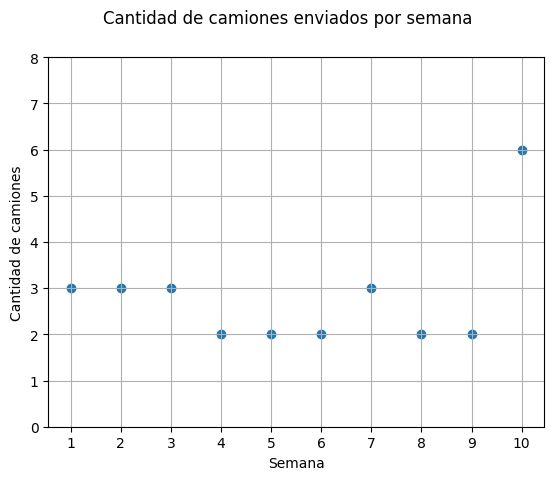

In [33]:
Al_sample = np.sum(Al, axis=(0,1))
ExT_sample = np.sum(ExT, axis=0)
Cam_sum_over_time = np.sum(Cam, axis=(0,1,2,3))
print("np shape Al_sample = ", np.shape(Al_sample))

fig, ax = plt.subplots()
input = Cam_sum_over_time
print(np.shape(input)[0])

ax.scatter(T, input) # Cambiar slicing para graficar}
# for y in range(np.shape(ExT_sample)[0]):
#     ax.scatter(T, ExT_sample[y,:], label="ExT") 
ax.grid(True)
fig.suptitle("Cantidad de camiones enviados por semana")
ax.set_xlabel("Semana")
ax.set_ylabel("Cantidad de camiones")
ax.ticklabel_format(useOffset=False)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_xticks(T)
# ax.set_xticklabels(T)
# print(f"max input = {int(np.max(input))}")
# ax.set_yticklabels(range(0,int(np.max(input))))
plt.show()




Camión 1
El camión 1 lleva productos de tipo Hortofruticola en el tiempo t = 1
Se transportaron 16460.0 unidades de Platano.
Se transportaron 47070.0 unidades de Manzana.
Se transportaron 14461.0 unidades de Limon.
Se transportaron 41083.0 unidades de Tomate.
Se transportaron 11514.0 unidades de Palta.
Peso total para camión e = 1 en tiempo t = 1: 24999.9 kg.
El camión 1 lleva productos de tipo Hortofruticola en el tiempo t = 7
Se transportaron 94265.0 unidades de Platano.
Se transportaron 47070.0 unidades de Manzana.
Se transportaron 14461.0 unidades de Limon.
Peso total para camión e = 1 en tiempo t = 7: 24999.85 kg.
El camión 1 lleva productos de tipo Hortofruticola en el tiempo t = 9
Se transportaron 101510.0 unidades de Platano.
Se transportaron 3466.0 unidades de Manzana.
Se transportaron 11191.0 unidades de Papa de guarda.
Se transportaron 11293.0 unidades de Zanahoria.
Se transportaron 11514.0 unidades de Palta.
Peso total para camión e = 1 en tiempo t = 9: 25000.000000000004 

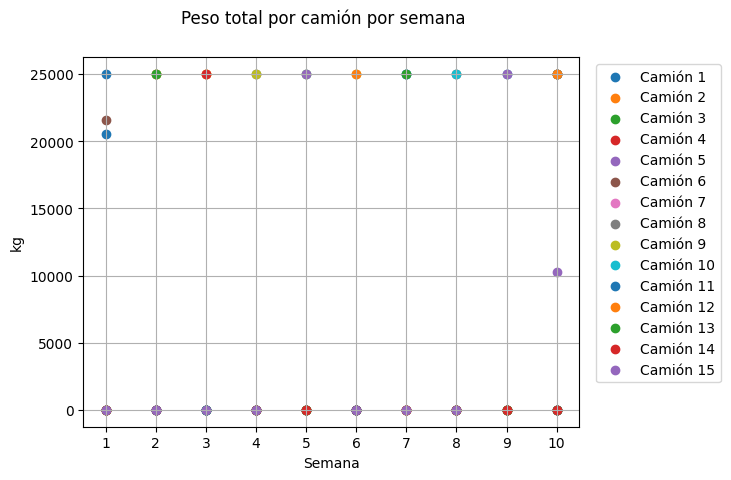

In [35]:
# printear (quicksum(Al[a,i,k,t]*P_ai[(a,i)] for a in A for i in I) for k for t
pesos_cam_tiempo = np.zeros((len(E),len(T)))
for e in E:
    print(f"\nCamión {e}")
    for t in T:
        # print(f"Tiempo {t}")
        current_peso = 0
        for j in J:
            for k in K:
                for i in I:
                    # print(f"Tr[:,{i},{j},{k},{t},{e}] = {Tr[:,i-1,j-1,k-1,t-1,e-1]}")
                    if Tr[:,i-1,j-1,k-1,t-1,e-1].any() != 0:
                        print(f"El camión {e} lleva productos de tipo {dict_tipos[i]} en el tiempo t = {t}")
                        for a in A:
                            if Tr[a-1,i-1,j-1,k-1,t-1,e-1] != 0:
                                print(f"Se transportaron {Tr[a-1,i-1,j-1,k-1,t-1,e-1]} unidades de {dict_alimentos[i][a]}.")
                                current_peso += Tr[a-1,i-1,j-1,k-1,t-1,e-1]*P_ai[(a,i)]   
        if current_peso != 0:
            print(f"Peso total para camión e = {e} en tiempo t = {t}: {current_peso} kg.")
        pesos_cam_tiempo[e-1,t-1] = current_peso

# print(pesos_cam_tiempo)

fig, ax = plt.subplots()
input = pesos_cam_tiempo
print(np.shape(input)[0])
for ydim in range(np.shape(input)[0]):
    ax.scatter(T, input[ydim,:], label=f"Camión {ydim+1}") # Cambiar slicing para graficar}

ax.legend(loc='upper right', bbox_to_anchor=[1.3, 1])
ax.grid(True)
fig.suptitle("Peso total por camión por semana")
ax.set_xlabel("Semana")
ax.set_ylabel("kg")
ax.set_xticks(T)
ax.ticklabel_format(useOffset=False)
plt.show()


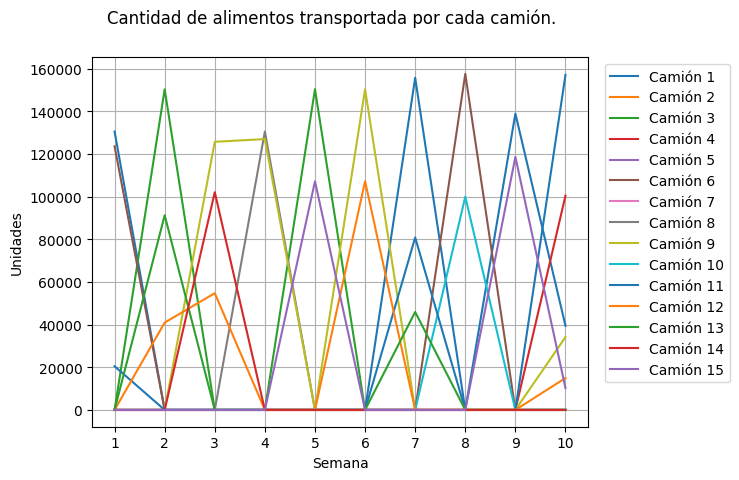

In [36]:
camiones_array = np.sum(Tr, axis=(0,1,2,3))

fig, ax = plt.subplots()
for camion in E:
    ax.plot(T, camiones_array[:,camion-1], label=f"Camión {camion}")
ax.legend(loc='upper right', bbox_to_anchor=[1.3, 1])
ax.grid(True)
fig.suptitle("Cantidad de alimentos transportada por cada camión.")
ax.set_xlabel("Semana")
ax.set_ylabel("Unidades")
ax.set_xticks(T)
ax.ticklabel_format(useOffset=False)
plt.show()